## Thermodynamic properties of pure water

In [10]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# import water properties
import iapws


You can find information about the water properties in the following link:

https://iapws.readthedocs.io/en/latest/modules.html

In [11]:
#Now compute properties for given pressure and temperature

# pressure and temperature in MPa, and C
p, T =35, 300

#compute properties
steam=iapws.IAPWS97(T=T+273.15, P=p) # note that iaapws uses temperature in K and pressure in MPa

#format the output for printing
output_format = "{:<17} = {:>10.2f} {}\n"
viscosity_format = "{:<17} = {:>10.2e} {}\n"

output = (output_format.format("Density", steam.rho, "kg/m\u00B3") +
          output_format.format("Specific heat", steam.cp*1000, "J/(kg\u00B7K)") +
          viscosity_format.format("Viscosity", steam.mu, "Pa\u00B7s") +
          output_format.format("Specific enthalpy", steam.h, "J/kg"))

print(output)

Density           =     757.72 kg/m³
Specific heat     =    4990.59 J/(kg·K)
Viscosity         =   9.47e-05 Pa·s
Specific enthalpy =    1326.81 J/kg



Now make plots of the fluid properties as a function of temperature and pressure.

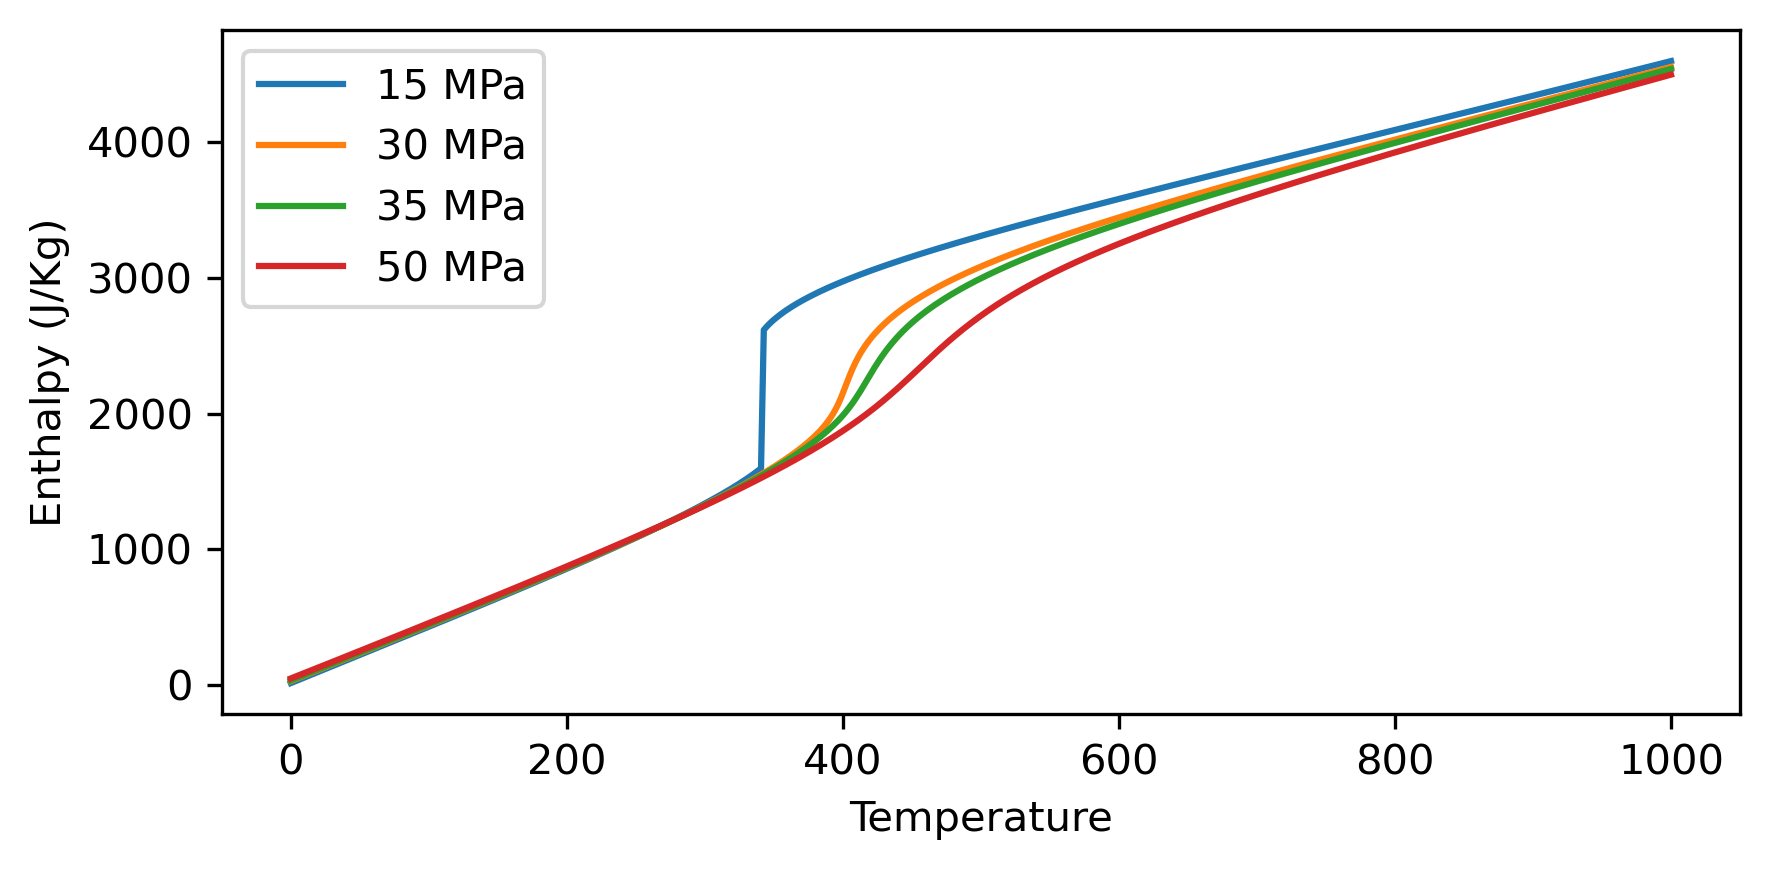

In [19]:
# start easy and make a single plot of density vs temperature
T=np.linspace(0, 1000, 500) # deg.C
P=np.array([15, 30, 35, 50]) # MPa

# compute density
rho=np.zeros((len(P), len(T)))
for i in range(len(P)):
    for j in range(len(T)):
        steam=iapws.IAPWS97(T=T[j]+273.15, P=P[i])
        rho[i,j]=steam.h

# plot

fig,ax = plt.subplots(1,1, figsize=(6,3))
for i in range(len(P)):
    ax.plot(T, rho[i,:], label=f'{P[i]} MPa')

ax.set_ylabel('Enthalpy (J/Kg)')
ax.set_xlabel('Temperature')
ax.legend()
fig.tight_layout()

# save figure
#fig.savefig('density_pt.svg')


Make similar plots for specific heat, enthalpy, viscosity.

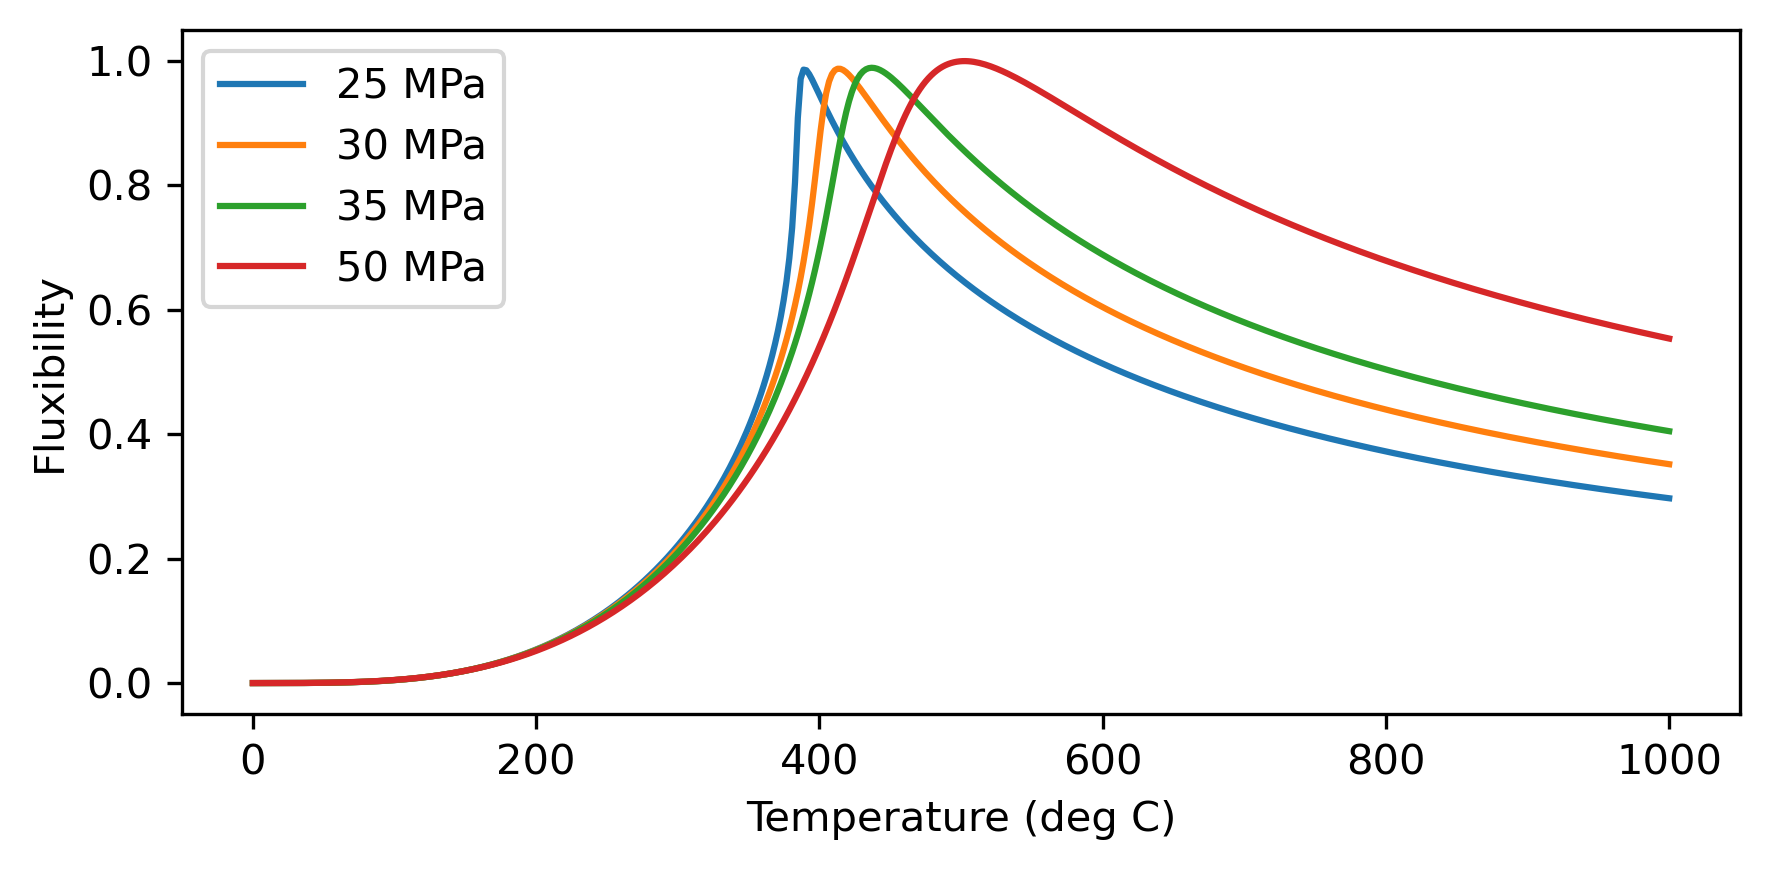

In [26]:
# start easy and make a single plot of density vs temperature
T=np.linspace(0, 1000, 500) # deg.C
P=np.array([25, 30, 35, 50]) # MPa



# compute density
Fluxibility=np.zeros((len(P), len(T)))
for i in range(len(P)):

    rho0 = iapws.IAPWS97(T=5+273.15, P=P[i]).rho
    for j in range(len(T)):
        steam=iapws.IAPWS97(T=T[j]+273.15, P=P[i])
        Fluxibility[i,j]=(rho0-steam.rho)*steam.rho*steam.h/steam.mu

# plot

fig,ax = plt.subplots(1,1, figsize=(6,3))
for i in range(len(P)):
    ax.plot(T, Fluxibility[i,:]/np.max(Fluxibility.ravel()), label=f'{P[i]} MPa')

ax.set_xlabel('Temperature (deg C)')
ax.set_ylabel('Fluxibility')
ax.legend()
fig.tight_layout()

# save figure
#fig.savefig('fluxibility_pt.svg')



In [ ]:
rho0 = iapws.IAPWS97(T=5+273.15, P=P[i]).rho